In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Alex\AppData\Local\Temp\ipykernel_13804\686016230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
financials = pd.DataFrame({'month' :   ['01/01/2019', '01/02/2019', '01/03/2019', '01/03/2019', '01/04/2019', '01/05/2019', '01/06/2019', '01/07/2019', '01/08/2019', '01/09/2019', '01/10/2019', '01/11/2019', '01/12/2019', '01/12/2019'],
                           'profit' : ['1.20$', '1.30$', '1.25$', '1.25$', '1.27$', '1.11$', '1.23$', '1.20$', '1.31$', '1.24$', '1.18$', '1.17$', '1.23$', '1.23$'],
                           'MoM' :     [0.03, -0.02, 0.01, 0.02, -0.01, -0.015, 0.017, 0.04, 0.02, 0.01, 0.00, -0.01, 2.00, 2.00],
                           'high' :    ['Dubai', 'Paris', 'singapour', 'singapour', 'moscow', 'Paris', 'Madrid', 'moscow', 'london', 'london', 'Moscow', 'Rome', 'madrid', 'madrid']
                           })
 
financials

,month,profit,MoM,high
0,01/01/2019,1.20$,0.030,Dubai
1,01/02/2019,1.30$,-0.020,Paris
2,01/03/2019,1.25$,0.010,singapour
3,01/03/2019,1.25$,0.020,singapour
4,01/04/2019,1.27$,-0.010,moscow
5,01/05/2019,1.11$,-0.015,Paris
6,01/06/2019,1.23$,0.017,Madrid
7,01/07/2019,1.20$,0.040,moscow
8,01/08/2019,1.31$,0.020,london
9,01/09/2019,1.24$,0.010,london


In [4]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   14 non-null     object 
 1   profit  14 non-null     object 
 2   MoM     14 non-null     float64
 3   high    14 non-null     object 
dtypes: float64(1), object(3)
memory usage: 580.0+ bytes


In [5]:
# Дубликаты
# Поиск дубликатов

In [6]:
financials.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
dtype: bool

In [7]:
financials.duplicated(keep='last')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
dtype: bool

In [8]:
financials[financials.duplicated(keep = 'first')]

,month,profit,MoM,high
13,01/12/2019,1.23$,2.0,madrid


In [9]:
# с помощью параметра subset мы ищем дубликаты по конкретным столбцам
financials.duplicated(subset = ['month'])

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
dtype: bool

In [10]:
# посчитаем количество дубликатов по столбцу month
financials.duplicated(subset = ['month']).sum()

2

In [11]:
# укажем параметр keep = 'last', больше доверяя, таким образом,
# последнему записанному за конкретный месяц значению
financials[financials.duplicated(subset = ['month'], keep = 'last')]

,month,profit,MoM,high
2,01/03/2019,1.25$,0.01,singapour
12,01/12/2019,1.23$,2.00,madrid


In [12]:
( ~ financials.duplicated(subset = ['month'])).sum()

12

In [13]:
financials[ ~ financials.duplicated(subset = ['month'], keep = 'last')]

,month,profit,MoM,high
0,01/01/2019,1.20$,0.030,Dubai
1,01/02/2019,1.30$,-0.020,Paris
3,01/03/2019,1.25$,0.020,singapour
4,01/04/2019,1.27$,-0.010,moscow
5,01/05/2019,1.11$,-0.015,Paris
6,01/06/2019,1.23$,0.017,Madrid
7,01/07/2019,1.20$,0.040,moscow
8,01/08/2019,1.31$,0.020,london
9,01/09/2019,1.24$,0.010,london
10,01/10/2019,1.18$,0.000,Moscow


In [14]:
financials.drop_duplicates(keep='last',
                           subset=['month'],
                           ignore_index=True,
                           inplace=True)
financials

,month,profit,MoM,high
0,01/01/2019,1.20$,0.030,Dubai
1,01/02/2019,1.30$,-0.020,Paris
2,01/03/2019,1.25$,0.020,singapour
3,01/04/2019,1.27$,-0.010,moscow
4,01/05/2019,1.11$,-0.015,Paris
5,01/06/2019,1.23$,0.017,Madrid
6,01/07/2019,1.20$,0.040,moscow
7,01/08/2019,1.31$,0.020,london
8,01/09/2019,1.24$,0.010,london
9,01/10/2019,1.18$,0.000,Moscow


In [15]:
# Неверные значения

In [16]:
financials.MoM.mean()

0.1735

In [17]:
financials.iloc[11,2] = 0.02

In [18]:
financials.MoM.mean()

0.008499999999999999

In [19]:
# Форматирование значений
# Тип str вместо float

In [20]:
financials.profit.sum()

'1.20$1.30$1.25$1.27$1.11$1.23$1.20$1.31$1.24$1.18$1.17$1.23$'

In [21]:
# удалим знак доллара ($)
financials['profit'] = financials['profit'].str.strip('$')
# заменим тип данных на FLOAT
financials['profit'] = financials['profit'].astype('float')

In [22]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     object 
 1   profit  12 non-null     float64
 2   MoM     12 non-null     float64
 3   high    12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 516.0+ bytes


In [23]:
# проверим превратился ли тип данных во float
assert financials.profit.dtype == float

In [24]:
financials.profit.sum()

14.69

In [25]:
# Названия городов с заглавной буквы

In [26]:
financials

,month,profit,MoM,high
0,01/01/2019,1.20,0.030,Dubai
1,01/02/2019,1.30,-0.020,Paris
2,01/03/2019,1.25,0.020,singapour
3,01/04/2019,1.27,-0.010,moscow
4,01/05/2019,1.11,-0.015,Paris
5,01/06/2019,1.23,0.017,Madrid
6,01/07/2019,1.20,0.040,moscow
7,01/08/2019,1.31,0.020,london
8,01/09/2019,1.24,0.010,london
9,01/10/2019,1.18,0.000,Moscow


In [27]:
financials['high'] = financials['high'].str.title()

In [28]:
financials

,month,profit,MoM,high
0,01/01/2019,1.20,0.030,Dubai
1,01/02/2019,1.30,-0.020,Paris
2,01/03/2019,1.25,0.020,Singapour
3,01/04/2019,1.27,-0.010,Moscow
4,01/05/2019,1.11,-0.015,Paris
5,01/06/2019,1.23,0.017,Madrid
6,01/07/2019,1.20,0.040,Moscow
7,01/08/2019,1.31,0.020,London
8,01/09/2019,1.24,0.010,London
9,01/10/2019,1.18,0.000,Moscow


In [29]:
# Дата и время

In [31]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     object 
 1   profit  12 non-null     float64
 2   MoM     12 non-null     float64
 3   high    12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 516.0+ bytes


In [37]:
# запишем дату в формате datetime в столбец date1
financials['month'] = pd.to_datetime(financials['month'], format = '%d/%m/%Y')
financials

,month,profit,MoM,high,date1,date2,date3
0,2019-01-01,1.20,0.030,Dubai,2019-01-01,2019-01-01,2019-01-01
1,2019-02-01,1.30,-0.020,Paris,2019-02-01,2019-01-02,2019-02-01
2,2019-03-01,1.25,0.020,Singapour,2019-03-01,2019-01-03,2019-03-01
3,2019-04-01,1.27,-0.010,Moscow,2019-04-01,2019-01-04,2019-04-01
4,2019-05-01,1.11,-0.015,Paris,2019-05-01,2019-01-05,2019-05-01
5,2019-06-01,1.23,0.017,Madrid,2019-06-01,2019-01-06,2019-06-01
6,2019-07-01,1.20,0.040,Moscow,2019-07-01,2019-01-07,2019-07-01
7,2019-08-01,1.31,0.020,London,2019-08-01,2019-01-08,2019-08-01
8,2019-09-01,1.24,0.010,London,2019-09-01,2019-01-09,2019-09-01
9,2019-10-01,1.18,0.000,Moscow,2019-10-01,2019-01-10,2019-10-01


In [34]:
# для этого подойдет параметр infer_datetime_format = True
financials['date2'] = pd.to_datetime(financials['month'], infer_datetime_format = True)
financials

C:\Users\Alex\AppData\Local\Temp\ipykernel_13804\2275393863.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  financials['date2'] = pd.to_datetime(financials['month'], infer_datetime_format = True)


,month,profit,MoM,high,date1,date2
0,01/01/2019,1.20,0.030,Dubai,2019-01-01,2019-01-01
1,01/02/2019,1.30,-0.020,Paris,2019-02-01,2019-01-02
2,01/03/2019,1.25,0.020,Singapour,2019-03-01,2019-01-03
3,01/04/2019,1.27,-0.010,Moscow,2019-04-01,2019-01-04
4,01/05/2019,1.11,-0.015,Paris,2019-05-01,2019-01-05
5,01/06/2019,1.23,0.017,Madrid,2019-06-01,2019-01-06
6,01/07/2019,1.20,0.040,Moscow,2019-07-01,2019-01-07
7,01/08/2019,1.31,0.020,London,2019-08-01,2019-01-08
8,01/09/2019,1.24,0.010,London,2019-09-01,2019-01-09
9,01/10/2019,1.18,0.000,Moscow,2019-10-01,2019-01-10


In [35]:
# исправить неточность с месяцем можно с помощью параметра dayfirst = True
financials['date3'] = pd.to_datetime(financials['month'],
                                     infer_datetime_format = True,
                                     dayfirst = True)
financials

C:\Users\Alex\AppData\Local\Temp\ipykernel_13804\400337339.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  financials['date3'] = pd.to_datetime(financials['month'],


,month,profit,MoM,high,date1,date2,date3
0,01/01/2019,1.20,0.030,Dubai,2019-01-01,2019-01-01,2019-01-01
1,01/02/2019,1.30,-0.020,Paris,2019-02-01,2019-01-02,2019-02-01
2,01/03/2019,1.25,0.020,Singapour,2019-03-01,2019-01-03,2019-03-01
3,01/04/2019,1.27,-0.010,Moscow,2019-04-01,2019-01-04,2019-04-01
4,01/05/2019,1.11,-0.015,Paris,2019-05-01,2019-01-05,2019-05-01
5,01/06/2019,1.23,0.017,Madrid,2019-06-01,2019-01-06,2019-06-01
6,01/07/2019,1.20,0.040,Moscow,2019-07-01,2019-01-07,2019-07-01
7,01/08/2019,1.31,0.020,London,2019-08-01,2019-01-08,2019-08-01
8,01/09/2019,1.24,0.010,London,2019-09-01,2019-01-09,2019-09-01
9,01/10/2019,1.18,0.000,Moscow,2019-10-01,2019-01-10,2019-10-01


In [38]:
financials.dtypes

month     datetime64[ns]
profit           float64
MoM              float64
high              object
date1     datetime64[ns]
date2     datetime64[ns]
date3     datetime64[ns]
dtype: object

In [39]:
financials.drop(labels=['date1','date2','date3'],axis=1, inplace=True)

In [41]:
financials.set_index('month', inplace=True)

In [42]:
financials

,profit,MoM,high
month,,,
2019-01-01,1.20,0.030,Dubai
2019-02-01,1.30,-0.020,Paris
2019-03-01,1.25,0.020,Singapour
2019-04-01,1.27,-0.010,Moscow
2019-05-01,1.11,-0.015,Paris
2019-06-01,1.23,0.017,Madrid
2019-07-01,1.20,0.040,Moscow
2019-08-01,1.31,0.020,London
2019-09-01,1.24,0.010,London


In [43]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   profit  12 non-null     float64
 1   MoM     12 non-null     float64
 2   high    12 non-null     object 
dtypes: float64(2), object(1)
memory usage: 384.0+ bytes


In [44]:
# создадим последовательность из 12 месяцев,
# передав начальный период (start), общее количество периодов (periods)
# и день начала каждого периода (MS, т.е. month start)
range = pd.date_range(start = '1/1/2020', periods = 12, freq = 'MS')
 
# сделаем эту последовательность индексом датафрейма
financials.index = range
financials


,profit,MoM,high
2020-01-01,1.20,0.030,Dubai
2020-02-01,1.30,-0.020,Paris
2020-03-01,1.25,0.020,Singapour
2020-04-01,1.27,-0.010,Moscow
2020-05-01,1.11,-0.015,Paris
2020-06-01,1.23,0.017,Madrid
2020-07-01,1.20,0.040,Moscow
2020-08-01,1.31,0.020,London
2020-09-01,1.24,0.010,London
2020-10-01,1.18,0.000,Moscow


In [45]:
# срез по дате

In [46]:
financials['2020-01':'2020-06']

,profit,MoM,high
2020-01-01,1.20,0.030,Dubai
2020-02-01,1.30,-0.020,Paris
2020-03-01,1.25,0.020,Singapour
2020-04-01,1.27,-0.010,Moscow
2020-05-01,1.11,-0.015,Paris
2020-06-01,1.23,0.017,Madrid


In [47]:
financials.index = financials.index.strftime('%B')

In [48]:
financials

,profit,MoM,high
January,1.20,0.030,Dubai
February,1.30,-0.020,Paris
March,1.25,0.020,Singapour
April,1.27,-0.010,Moscow
May,1.11,-0.015,Paris
June,1.23,0.017,Madrid
July,1.20,0.040,Moscow
August,1.31,0.020,London
September,1.24,0.010,London
October,1.18,0.000,Moscow


array([[<Axes: title={'center': 'Profit_2020'}>,
        <Axes: title={'center': 'MoM Revenue Change 2020'}>]],
      dtype=object)

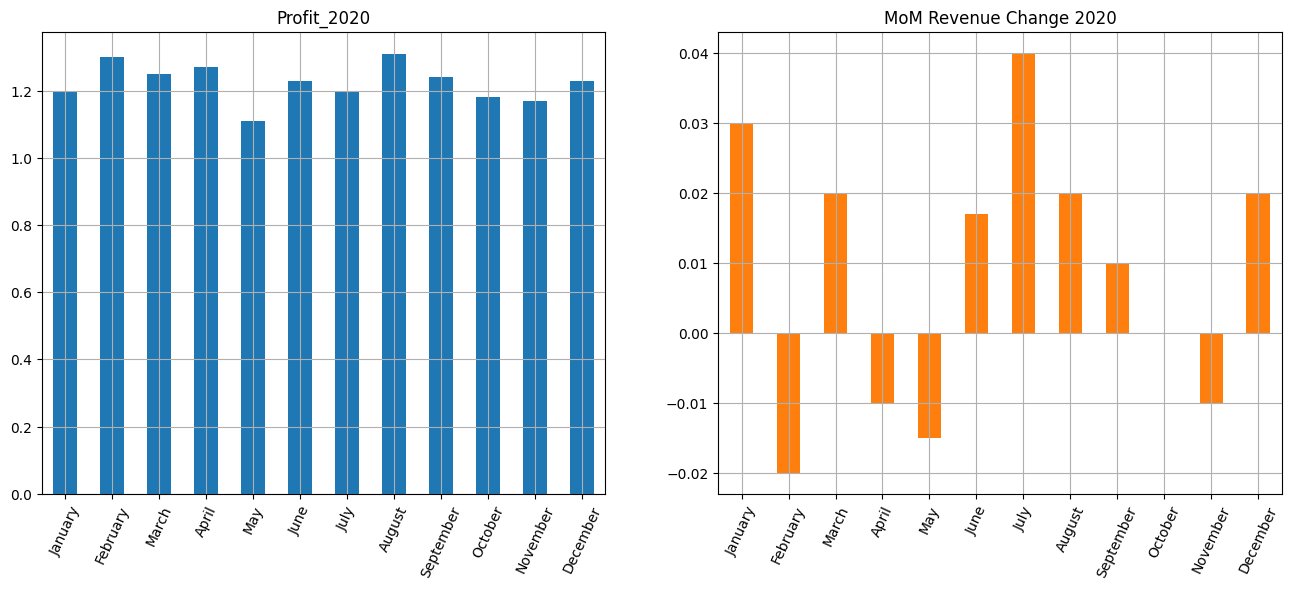

In [49]:
financials[['profit','MoM']].plot(subplots=True,
                                  layout = (1,2),
                                  kind = 'bar',
                                  rot = 65,
                                  grid = True,
                                  figsize = (16,6),
                                  legend=False,
                                  title = ['Profit_2020', 'MoM Revenue Change 2020'])